# MALIGNANT COMMENTS PRIDICTION

In [1]:
#LOADING THE IMPORTANT MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#LOADING THE TRAIN DATASET

train_df=pd.read_csv("malignant.tsv",sep="\t")

test_df=pd.read_csv("malignant.test.csv", sep="\t")

In [3]:
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


First 5 rows of train DataFrame.

In [4]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


First 5 rows of test DataFrame.

In [5]:
train_df.shape

(159621, 8)

There are 159621 rows and 8 columns in train DataFrame.

In [6]:
test_df.shape

(153186, 2)

There are 153186 rows and 2 columns in test DataFrame.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159621 entries, 0 to 159620
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159621 non-null  object 
 1   comment_text      159547 non-null  object 
 2   malignant         159528 non-null  float64
 3   highly_malignant  159528 non-null  float64
 4   rude              159528 non-null  float64
 5   threat            159528 non-null  float64
 6   abuse             159528 non-null  float64
 7   loathe            159509 non-null  float64
dtypes: float64(6), object(2)
memory usage: 9.7+ MB


There are some null values in Train DataFrame.

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153186 entries, 0 to 153185
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153186 non-null  object
 1   comment_text  153157 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


There are some null values in test DataFrame.

In [9]:
train_df.dtypes

id                   object
comment_text         object
malignant           float64
highly_malignant    float64
rude                float64
threat              float64
abuse               float64
loathe              float64
dtype: object

Object and flaot type of data in train dataframe.

In [10]:
test_df.dtypes

id              object
comment_text    object
dtype: object

Only object type of data in test dataframe.

In [11]:
train_df.keys()

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

All columns of train DataFrame.

In [12]:
test_df.keys()

Index(['id', 'comment_text'], dtype='object')

All columns of test DataFrame.

# CHECKING NULL VALUES

In [13]:
train_df.isnull().sum()

id                    0
comment_text         74
malignant            93
highly_malignant     93
rude                 93
threat               93
abuse                93
loathe              112
dtype: int64

There are 74 null values in comment_text, 93 null values in malignant, 93 null values in highly_malignant, 93 null values in rude, 93 null values in threat, 93 null values in abuse and 112 null values in loathe in train DataFrame. 

In [14]:
test_df.isnull().sum()

id               0
comment_text    29
dtype: int64

There are 29 null values in comment_text test DataFrame.

# FILLING MISSING VALUES

TRAIN DATAFRAME

In [15]:
train_df["comment_text"].isnull().sum()

74

In [16]:
train_df["comment_text"].mode()

0    0
Name: comment_text, dtype: object

In [17]:
train_df["comment_text"].fillna(train_df["comment_text"].mode()[0],inplace=True)

In [18]:
train_df["comment_text"].isnull().sum()

0

Null value has been filled in comment_text.

In [19]:
train_df["malignant"].mode()

0    0.0
Name: malignant, dtype: float64

In [20]:
train_df["malignant"].fillna(train_df["malignant"].mode()[0],inplace=True)

In [21]:
train_df["malignant"].isnull().sum()

0

Null values has been filled in malignant.

In [22]:
train_df["highly_malignant"].isnull().sum()

93

In [23]:
train_df["highly_malignant"].mode()

0    0.0
Name: highly_malignant, dtype: float64

In [24]:
train_df["highly_malignant"].fillna(train_df["highly_malignant"].mode()[0],inplace=True)

In [25]:
train_df["highly_malignant"].isnull().sum()

0

Null values has been filled in highly_malignant.

In [26]:
train_df["rude"].isnull().sum()

93

In [27]:
train_df["rude"].mode()

0    0.0
Name: rude, dtype: float64

In [28]:
train_df["rude"].fillna(train_df["rude"].mode()[0],inplace=True)

In [29]:
train_df["rude"].isnull().sum()

0

Null value has been filled in rude column.

In [30]:
train_df["threat"].isnull().sum()

93

In [31]:
train_df["threat"].mode()

0    0.0
Name: threat, dtype: float64

In [32]:
train_df["threat"].fillna(train_df["threat"].mode()[0], inplace=True)

In [33]:
train_df["threat"].isnull().sum()

0

Null values has been filled in threat column.

In [34]:
train_df["abuse"].isnull().sum()

93

In [35]:
train_df["abuse"].mode()

0    0.0
Name: abuse, dtype: float64

In [36]:
train_df["abuse"].fillna(train_df["abuse"].mode()[0],inplace=True)

In [37]:
train_df["abuse"].isnull().sum()

0

Null values has been filled in abuse column.

In [38]:
train_df["loathe"].isnull().sum()

112

In [39]:
train_df["loathe"].mode()

0    0.0
Name: loathe, dtype: float64

In [40]:
train_df["loathe"].fillna(train_df["loathe"].mode()[0],inplace=True)

In [41]:
train_df["loathe"].isnull().sum()

0

null values has been filled in loathe column.

CHECKING NULL VALUES AFETR FILL.

In [42]:
train_df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

BY GRAPH

<AxesSubplot: >

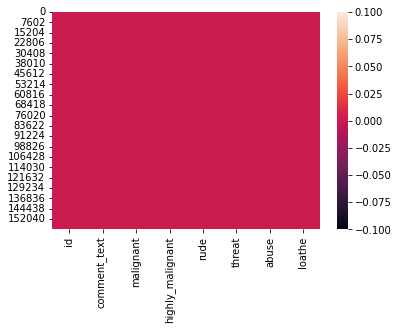

In [43]:
sns.heatmap(train_df.isnull())

No blanks it means no null values in train DataFrame.

TEST DATAFRAME

In [44]:
test_df.isnull().sum()

id               0
comment_text    29
dtype: int64

In [45]:
test_df["comment_text"].isnull().sum()

29

In [46]:
test_df["comment_text"].mode()

0    #NAME?
Name: comment_text, dtype: object

In [47]:
test_df["comment_text"].fillna(test_df["comment_text"].mode()[0], inplace=True)

In [48]:
test_df["comment_text"].isnull().sum()

0

Null values has been filled in comment_test.

CHECKING NULL VALUES AFTER FILL

In [49]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

BY GRAPH

<AxesSubplot: >

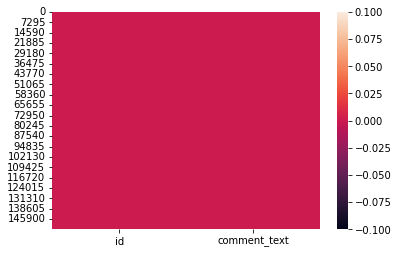

In [50]:
sns.heatmap(test_df.isnull())

No balnks it means no null values in test DataFrame.

# STATISTICAL SUMMARY 

In [51]:
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159621.000000,159621.000000,159621.000000,159621.000000,159621.000000,159621.000000
mean,0.095783,0.009999,0.052900,0.002995,0.049336,0.008802
std,0.294295,0.099493,0.223835,0.054641,0.216568,0.093406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


No null values in train dataset.

In [52]:
test_df.describe()

,id,comment_text
count,153186,153186
unique,153186,153032
top,00001cee341fdb12,#NAME?
freq,1,155


No null values in test dataset.

In [53]:
train_df.corr().sum().sort_values(ascending=False)

abuse               3.252177
rude                3.248776
malignant           3.055547
highly_malignant    2.411608
loathe              2.207477
threat              1.687056
dtype: float64

abuse and rude columns are highly correlated and threat is very less correlated.

# DATA VISUALIZATION OR EDA

In [54]:
train_df.keys()

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [55]:
train_df["id"].value_counts()

0000997932d777bf    1
3950589e82500939    1
394c379b686bb2f3    1
394cacb160ea07c8    1
394e0de4684a247b    1
                   ..
8e4015d1217fe8e7    1
8e405319136593bc    1
8e4290547502ec1a    1
8e4292866044a0a0    1
fff46fc426af1f9a    1
Name: id, Length: 159621, dtype: int64

Lenght of id is 159621 , id is not much important for the data so we can drop this column.

In [56]:
train_df.drop("id",axis=1,inplace=True)

In [57]:
train_df.keys()

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

id column has been dropped.

In [58]:
train_df["comment_text"].value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Lenght of comment_text is 159530, it means every comments are diferent.

In [59]:
train_df["malignant"].value_counts()

0.0    144332
1.0     15289
Name: malignant, dtype: int64

<AxesSubplot: >

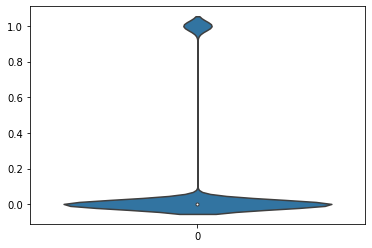

In [60]:
sns.violinplot(train_df["malignant"])

Out of 159621, 144332 comments are not malignant and 15289 comments are malignant.

In [61]:
train_df["highly_malignant"].value_counts()

0.0    158025
1.0      1596
Name: highly_malignant, dtype: int64

<AxesSubplot: >

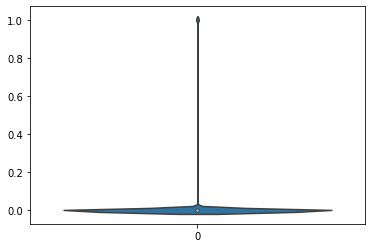

In [62]:
sns.violinplot(train_df["highly_malignant"])

158025 comments are not highly malignant and 1596 comments are highly malignant.

In [63]:
train_df["rude"].value_counts()

0.0    151177
1.0      8444
Name: rude, dtype: int64

<AxesSubplot: >

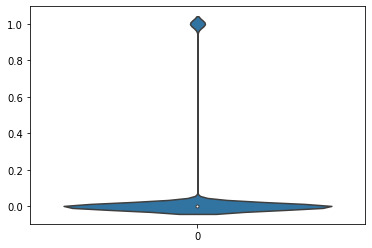

In [64]:
sns.violinplot(train_df["rude"])

Out of 159621, 8444 comments are rude.

In [65]:
train_df["threat"].value_counts()

0.0    159143
1.0       478
Name: threat, dtype: int64

<AxesSubplot: >

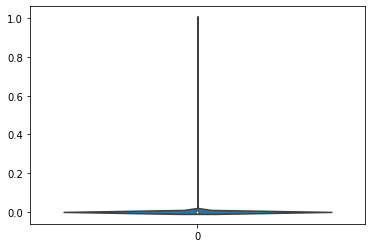

In [66]:
sns.violinplot(train_df["threat"])

Out of 159621, 478 comments are threat.

In [67]:
train_df["abuse"].value_counts()

0.0    151746
1.0      7875
Name: abuse, dtype: int64

<AxesSubplot: >

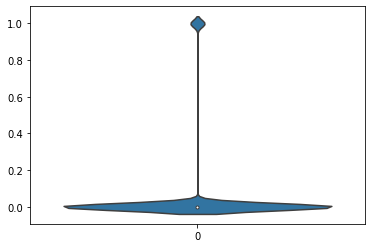

In [68]:
sns.violinplot(train_df["abuse"])

7875 comments are abuse.

In [69]:
train_df["loathe"].value_counts()

0.0    158216
1.0      1405
Name: loathe, dtype: int64

<AxesSubplot: >

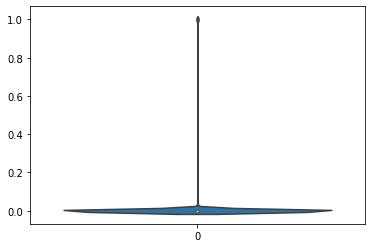

In [70]:
sns.violinplot(train_df["loathe"])

1405 comments are loathe.

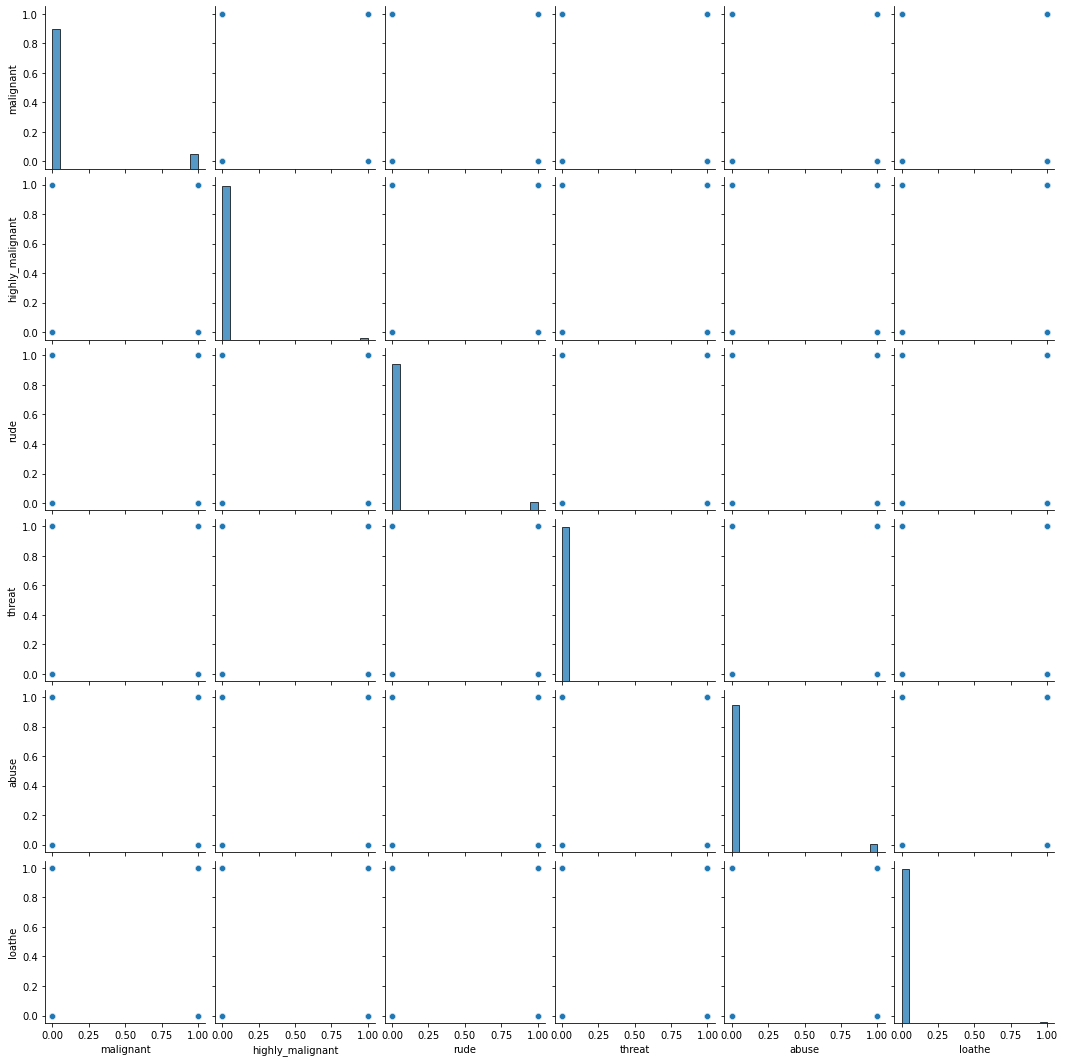

In [71]:
sns.pairplot(train_df)

# CHECKING THE SKEWNESS 

In [72]:
train_df.skew().sort_values(ascending=False)

threat              18.191876
loathe              10.517614
highly_malignant     9.850131
abuse                4.161917
rude                 3.994951
malignant            2.747057
dtype: float64

threat and loathe column has high skewness.

In [73]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string

In [74]:
train_df['length'] = train_df['comment_text'].str.len()
train_df.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,264
1,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,112


In [75]:
# Convert all messages to lower case
train_df['comment_text']=train_df['comment_text'].str.lower()

In [76]:
train_df['comment_text']

0         explanation\nwhy the edits made under my usern...
1         d'aww! he matches this background colour i'm s...
2         hey man, i'm really not trying to edit war. it...
3         "\nmore\ni can't make any real suggestions on ...
4         you, sir, are my hero. any chance you remember...
                                ...                        
159616    ":::::and for the second time of asking, when ...
159617    you should be ashamed of yourself \n\nthat is ...
159618    spitzer \n\numm, theres no actual article for ...
159619    and it looks like it was actually you who put ...
159620    "\nand ... i really don't think you understand...
Name: comment_text, Length: 159621, dtype: object

In [77]:
# Replace email addresses with 'email'
train_df['comment_text']=train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [78]:
# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [79]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train_df['comment_text'] = train_df['comment_text'].str.replace(r'£|\$', 'dollers')

In [80]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [81]:
# Replace numbers with 'numbr'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')


In [82]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))


In [83]:
train_df['clean_length'] = train_df.comment_text.str.len()
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation why the edits made under my userna...,0.0,0.0,0.0,0.0,0.0,0.0,264,263
1,d'aww! he matches this background colour i'm s...,0.0,0.0,0.0,0.0,0.0,0.0,112,121
2,"hey man, i'm really not trying to edit war. it...",0.0,0.0,0.0,0.0,0.0,0.0,233,233
3,more i can't make any real suggestions on impr...,0.0,0.0,0.0,0.0,0.0,0.0,622,611
4,"you, sir, are my hero. any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,67,67


In [84]:
# Total length removal
print ('Origian Length', train_df.length.sum())
print ('Clean Length', train_df.clean_length.sum())

Origian Length 62979376
Clean Length 62601017


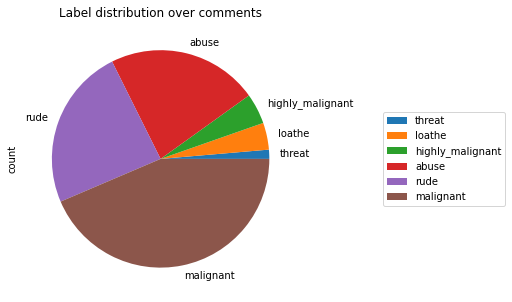

In [85]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train_df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

We can see rude and abuse comments are higher than others which comments are malignant.

In [86]:
target_data = train_df[cols_target]
train_df['bad'] =train_df[cols_target].sum(axis =1)
print(train_df['bad'].value_counts())

train_df['bad'] = train_df['bad'] > 0 
train_df['bad'] = train_df['bad'].astype(int)
print(train_df['bad'].value_counts())

0.0    143400
1.0      6360
3.0      4208
2.0      3478
4.0      1759
5.0       385
6.0        31
Name: bad, dtype: int64
0    143400
1     16221
Name: bad, dtype: int64


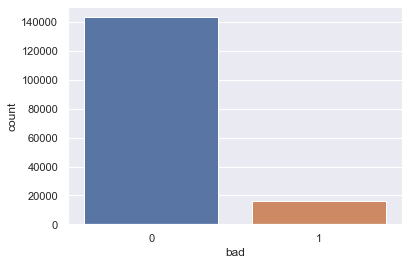

In [87]:
sns.set()
sns.countplot(x="bad",data=train_df)
plt.show()

143400 comments are not malignant and 16221 comments are malignant.

In [88]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train_df['comment_text'])
x = features

In [89]:
train_df.shape

(159621, 10)

In [90]:
test_df.shape

(153186, 2)

In [91]:
y=train_df['bad']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [94]:
print(y_train.shape),
print(y_test.shape)

(111734,)
(47887,)


In [95]:
# LogisticRegression
LG = LogisticRegression()
LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9599495229742065
Test accuracy is 0.9547685175517364
[[42707   247]
 [ 1919  3014]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42954
           1       0.92      0.61      0.74      4933

    accuracy                           0.95     47887
   macro avg       0.94      0.80      0.86     47887
weighted avg       0.95      0.95      0.95     47887



In [96]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9989170709005316
Test accuracy is 0.9412157788126214
[[41623  1331]
 [ 1484  3449]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42954
           1       0.72      0.70      0.71      4933

    accuracy                           0.94     47887
   macro avg       0.84      0.83      0.84     47887
weighted avg       0.94      0.94      0.94     47887



In [97]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988812715914582
Test accuracy is 0.9561676446634786
[[42388   566]
 [ 1533  3400]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42954
           1       0.86      0.69      0.76      4933

    accuracy                           0.96     47887
   macro avg       0.91      0.84      0.87     47887
weighted avg       0.95      0.96      0.95     47887



In [98]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9511428929421663
Test accuracy is 0.9491511266105623
[[42528   426]
 [ 2009  2924]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42954
           1       0.87      0.59      0.71      4933

    accuracy                           0.95     47887
   macro avg       0.91      0.79      0.84     47887
weighted avg       0.95      0.95      0.94     47887



In [99]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9220112051837399
Test accuracy is 0.9156556059055694
[[42772   182]
 [ 3857  1076]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     42954
           1       0.86      0.22      0.35      4933

    accuracy                           0.92     47887
   macro avg       0.89      0.61      0.65     47887
weighted avg       0.91      0.92      0.89     47887



# By using all the algorithms RandomForestClassifier is working well.

In [100]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [101]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988902214187266
Test accuracy is 0.9561885271576838
cross validation score : 95.6966808888017
[[42387   567]
 [ 1531  3402]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42954
           1       0.86      0.69      0.76      4933

    accuracy                           0.96     47887
   macro avg       0.91      0.84      0.87     47887
weighted avg       0.95      0.96      0.95     47887



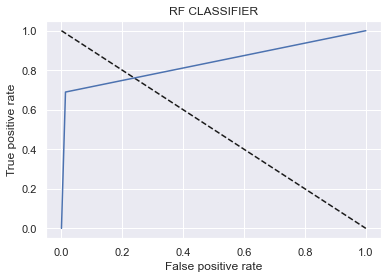

In [102]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [104]:
test_data=tf_vec.fit_transform(test_df['comment_text'])
test_data

<153186x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2945366 stored elements in Compressed Sparse Row format>

In [105]:
prediction=RF.predict(test_data)
prediction

array([1, 0, 0, ..., 1, 1, 0])

In [106]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']